In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# CHAPTER 2: 지도 학습
---
지도 학습에 관해 더 자세히 살펴보고 인기 있는 지도 학습 알고리즘 몇 가지를 알아보자.   
**목표: 이전에 본 적 없는 새로운 데이터에 대해 정확한 출력을 예측**

##### 2.1 분류(classification)와 회귀(regression)
* 분류: 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측
    * 이진 분류(binary classification)와 다중 분류(multiclass classification)
        * 이진 분류에서 한 클래스를 양성(positive) 클래스, 다른 하나를 음성(negative) 클래스라고 한다.
            * 양성 클래스는 학습하고자 하는 대상 (스팸메일 분류기의 경우 양성은 스팸 클래스)
* 회귀: 실수(부동소수점수) 예측
    * Ex) 어떤 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득 예측

##### 2.2 일반화, 과대적합, 과소적합
* 일반화(generalization): 모델이 처음 보는 데이터에 대해 정확하게 예측하는 경우
* 과대적합(overfitting): 가진 정보를 모두 사용해서 너무 복잡한 모델을 만들 경우 (새로운 데이터에 일반화 되기 어려울 때)
* 과소적합(underfitting): 과대적합의 반대의 경우

##### 2.3 지도 학습 알고리즘
##### 2.3.1분류를 위한 예시 데이터 셋

X.shape:  (26, 2)


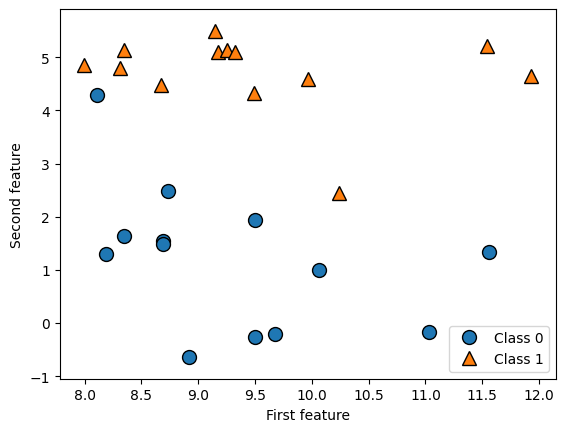

In [3]:
# 예제 데이터셋의 산점도 생성
# 데이터셋 생성 (forge 데이터셋은 인위적으로 만든 이진 분류 데이터셋)
X, y = mglearn.datasets.make_forge()

# 산점도 생성
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: ", X.shape)
# (26, 2) 데이터 셋을 이차원 좌표에 뿌리고 타깃값이 담긴 y에 따라 class 0, 1을 서로 다른 모양으로 표시

Text(0, 0.5, 'Target')

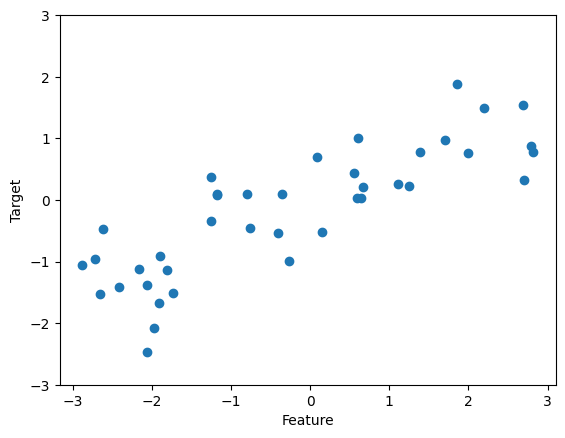

In [4]:
# 회귀 예제를 위한 예제(인공) 데이터셋
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

* 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암 데이터
    * 각 종양은 양성과 악성으로 레이블
    * 조직 데이터를 기반으로 종양이 악성인지를 예측

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("cancer.keys(): ", cancer.keys())

cancer.keys():  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
print("유방암 데이터의 형태: ", cancer.data.shape)

유방암 데이터의 형태:  (569, 30)


In [7]:
print("클래스별 샘플 개수:\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [8]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


**회귀를 위한 예시 데이터 셋**
* 보스턴 주택가격 데이터셋
* 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해 1970년대 보스턴 주변의 주택 평균 가격 예측
* 책의 예시로 나온 보스턴 주택가격 데이터셋은 윤리 문제로 scikit-learn 1.2 버전 이후로 삭제 됨.
* 대신 교육용을 위한 데이터 셋이 남아있으니 다음 코드를 통해서 해당 데이터셋을 가져올 수 있다.
* 하지만 책의 저자가 만든 mglearn 패키지에는 남아있으므로 그것을 사용하면 된다.

In [9]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [10]:
print("데이터의 형태: ", boston.shape)

데이터의 형태:  (506, 13)


In [11]:
X, y = mglearn.datasets.load_extended_boston()  # 특성 공학
print("X.shpae: ", X.shape)

X.shpae:  (506, 104)


##### 2.3.2 K-최근접 이웃

**K-최근접 이웃 분류**

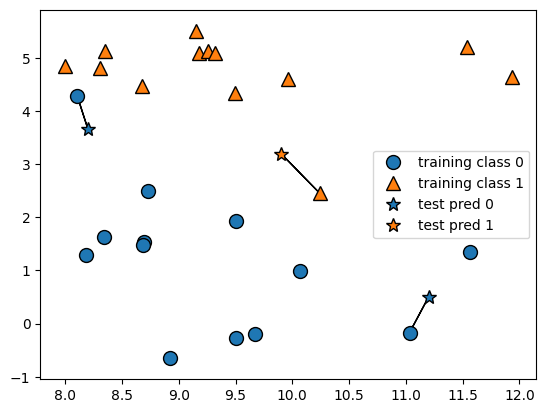

In [12]:
# 1-최근접 이웃 분류 예시
mglearn.plots.plot_knn_classification(n_neighbors=1)

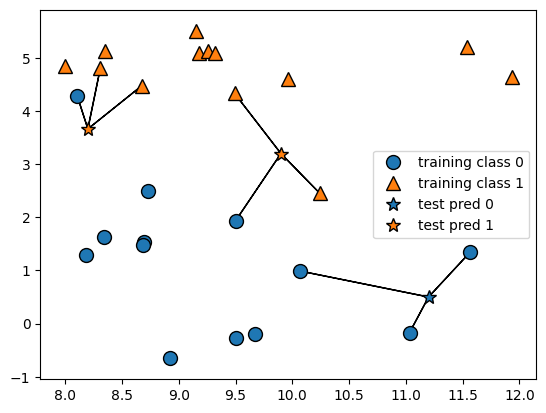

In [13]:
# 3-최근접 이웃 분류 예시
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [14]:
# K-최근접 이웃 알고리즘 적용
# 훈련 세트와 테스트 세트 나눔
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
# K-NN 객체 생성
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
# 모델 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
print("테스트 세트 예측: ", clf.predict(X_test))

테스트 세트 예측:  [1 0 1 0 1 0 0]


In [18]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


**KNeighborsClassifier 분석**

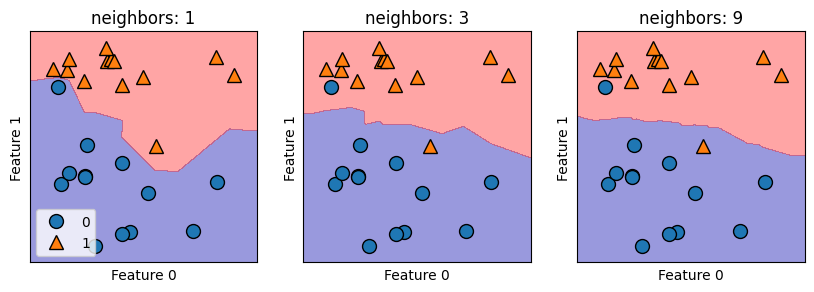

In [19]:
# 이웃이 하나, 셋, 아홉 개일 때의 결정 경계
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("neighbors: {}".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)
# 이웃을 적게 사용하면 모델의 복잡도가 높아지고 반대로 많이 사용하면 복잡도는 낮아진다.

c:\Users\supli\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\supli\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\supli\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\supli\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\supli\App

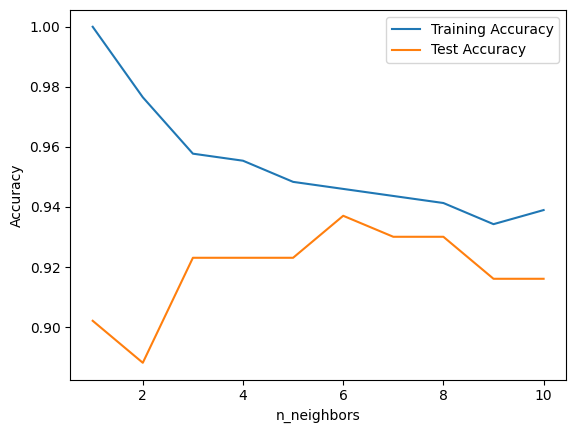

In [20]:
# 모델의 복잡도와 일반화 사이의 관계
# 실제 데이터를 사용
# 훈련 세트와 테스트 세트로 나눈 뒤 성능 평가
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# 1에서 10 까지 n_neighbos 적용
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf = clf.fit(X_train, y_train)
    # 훈련 세트의 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

위 그림을 통해 이웃이 적을 때는 과대적합되어 훈련 정확도는 완벽하지만 테스트 정확도는 오히려 낮은 것을 알 수 있다.   
하지만 반대로 이웃이 10일 경우는 과소적합되는 것을 알 수 있다.   
**위 그림을 바탕으로 이웃이 6일 때 일반화가 가장 잘 된다는 것을 알 수 있다.**

**K-최근접 이웃 회귀**

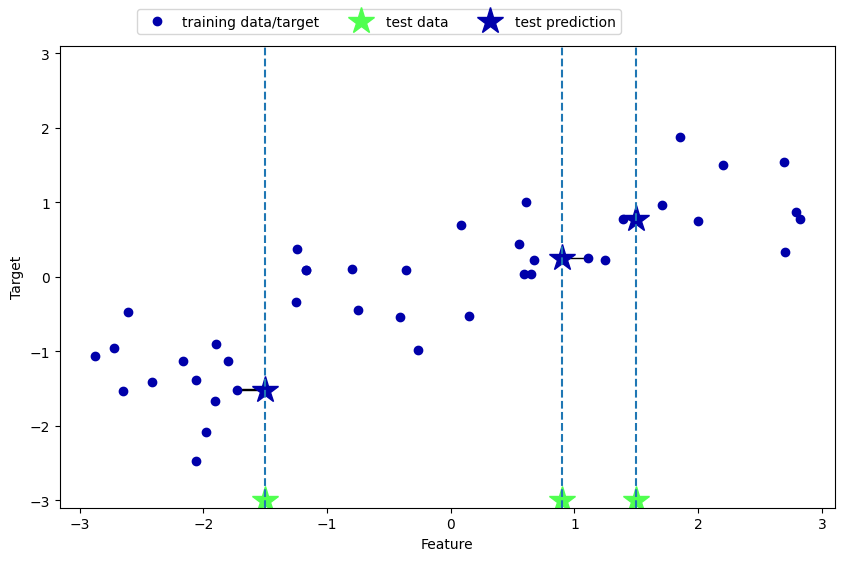

In [21]:
# wave 데이터셋에 대한 1-최근접 이웃 회귀 모델 예측
mglearn.plots.plot_knn_regression(n_neighbors=1)

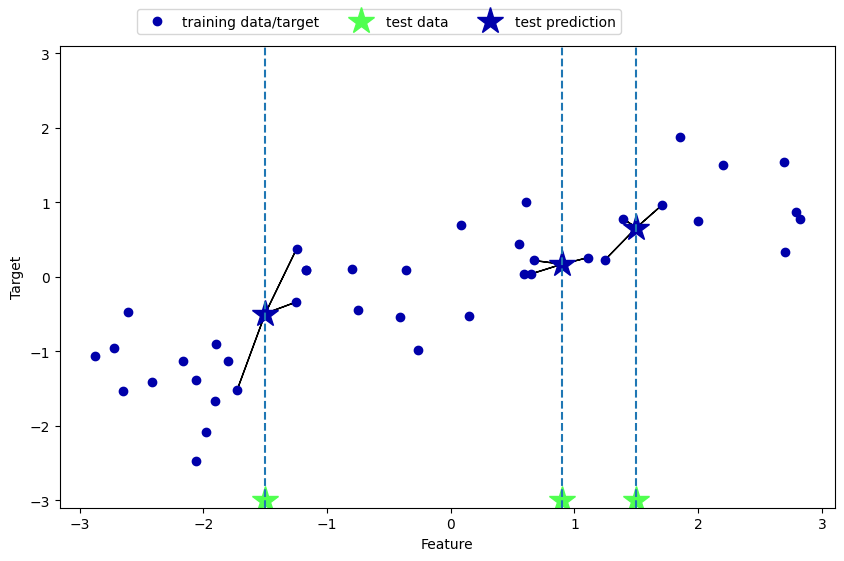

In [22]:
# 3-최근접 이웃일 때
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터 셋을 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델 객체 생성(n_neighbors=3)
reg = KNeighborsRegressor(n_neighbors=3)

# 모델 학습
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


회귀에서 score 메서드는 결정계수라고 불리는 $R^2$ 값을 반환한다.   
보통 0과 1사이의 값을 출력하며 1에 가까울수록 예측이 잘 되었다고 볼 수 있다.   
$R^2 = 1 - \frac {\sum (target - predict())^2} {\sum (target - mean(target))^2}$

In [25]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


In [26]:
numerator = 0
denominator = 0
for target , predict in zip(y_test, reg.predict(X_test)):
    numerator += ((target - predict) ** 2)
    denominator += ((target - np.mean(y_test)) ** 2)

print("직접 계산한 R^2: {:.2f}".format(1 - (numerator/denominator)))

직접 계산한 R^2: 0.83


KNeighborsRegressor 분석

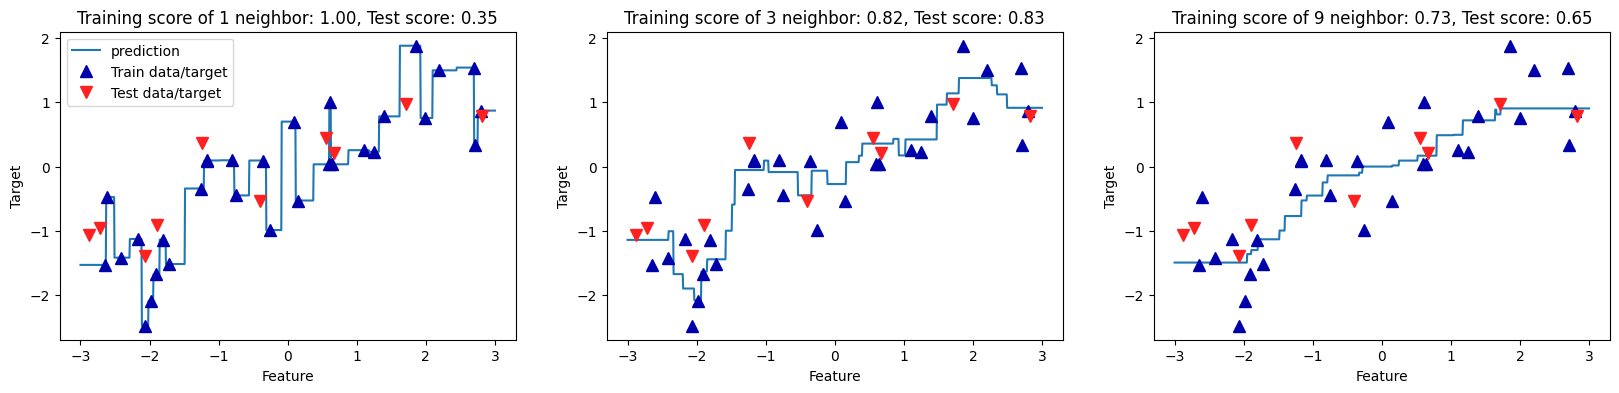

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "Training score of {} neighbor: {:.2f}, Test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["prediction", "Train data/target", "Test data/target"])

**KNN 정리**
* 장점: 이해하기 매우 쉬운 모델
* 단점: 훈련 세트가 매우크면 예측이 느려짐(예측 값 계산할 때 n개의 점과의 거리를 일일이 계산해야 하기 때문)
    * 특성이 많으면(수백 개 이상) 잘 작동하지 않음.
    * 특성 값이 대부분 0인 데이터 셋과도 잘 작동하지 않음.   
    
**-> 이해하기 쉽지만, 예측이 느리고 많은 특성을 처리하는 능력이 부족하여 현업에서 잘 쓰이지 않음.**

##### 2.3.3 선형 모델(linear model)

* KNN의 단점을 보완
* 입력 특성에 대한 선형 함수를 만들어 예측을 수행


**회귀의 선형 모델**

$\widehat{y} = w[0] \times x[0] + w[1] \times x[1] + ... + w[p] \times x[p] + b $

w[0]: 0.393906  b: -0.031804


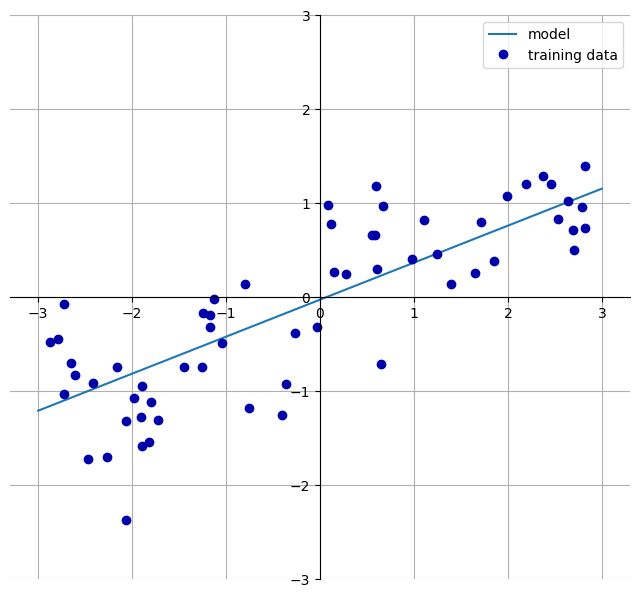

In [28]:
mglearn.plots.plot_linear_regression_wave()

직선을 사용하여 예측했기 때문에 예측이 데이터의 상세 정보를 모두 잃어버린 것처럼 보이지만   
특성이 많은 데이터셋이라면 선형 모델은 매우 훌륭한 성능을 낼 수 있다,

**선형 회귀(최소 제곱법)**

: 예측과 훈련 세트에 있는 타깃 y 사이의 ```평균제곱오차```를 최소화하는 파라미터 $w$와 $b$를 찾음.   

* 평균제곱오차 공식:   
$MSE = \frac {1} {n} \sum_{i=1}^{n} (y_i - \widehat y_i)^2$

In [29]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [30]:
print("lr.coef_: ", lr.coef_)   # 가중치 또는 계수
print("lr.intercept_: ", lr.intercept_) # 편향 또는 절편

lr.coef_:  [0.39390555]
lr.intercept_:  -0.031804343026759746


In [31]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
# R^2 값이 그리 좋은 것은 아니지만 훈련 세트와 테스트 점수가 매우 비슷하므로 과소적합

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [32]:
# 보스턴 주택 가격 데이터셋
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [33]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
# 특성이 많아 훈련 세트에서는 점수가 높지만 테스트 세트에서는 점수가 낮은 것을 알 수 있음: 과대 적합 -> 복잡도 제어

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


**릿지 회귀**

: 가중치(w)의 절댓값을 최대한 작게 하여 모든 특성이 출력에 주는 영향을 최소한으로 만듦. -> L2 규제   
    사용자가 지정하는 매개변수의 값으로 복잡도를 조절할 수 있다. (선형회귀와의 차이)

In [34]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))
# 훈련 세트 점수는 낮아졌지만 테스트 세트에 대한 점수는 높아진 것을 알 수 있음. -> 일반화가 더 잘 됨.

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [35]:
# alpha 값이 높아질수록 가중치를 0에 더 가깝게 만들어 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줌.
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [36]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


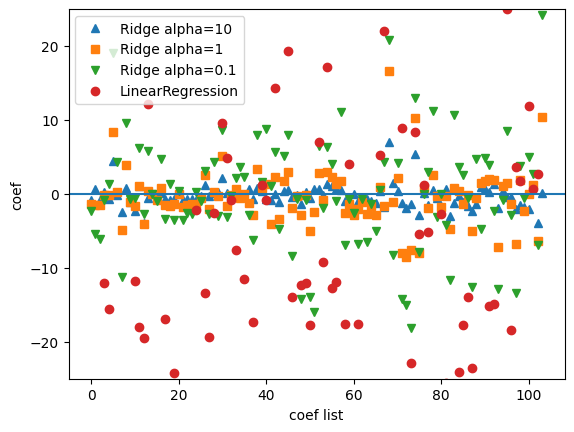

In [37]:
# alpha 값에 따른 모델의 coef_속성 변화
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("coef list")
plt.ylabel("coef")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()
# alpha값이 클수록 계수 값이 0에 가까운 것을 알 수 있다.

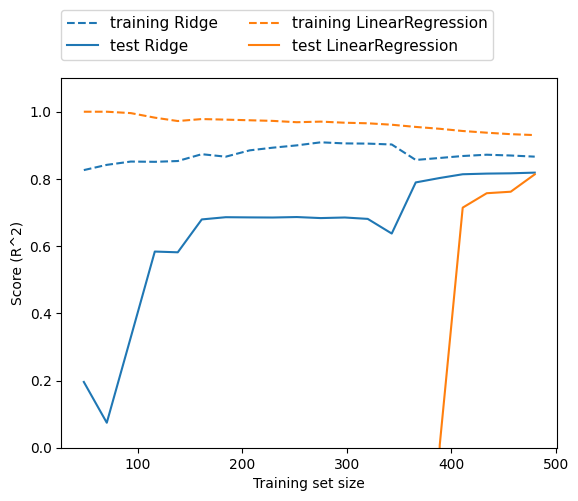

In [38]:
# 보스턴 주택가격 데이터셋에 대한 릿지 회귀와 선형회귀의 학습 곡선
mglearn.plots.plot_ridge_n_samples()
# 데이터를 충분히 주면 규제 항은 덜 중요해져서 릿지 회귀와 선형 회귀의 성능이 같아질 것

**라소**

: 선형 회귀에 적용하는 또 다른 규제로 L1 규제로 불린다.   
L2 규제와 마찬가지로 계수를 0에 가깝게 만드는 것이 목표이고, 어떤 계수는 실제로 0이 되기도 한다.

In [39]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso.coef_ != 0))
# 104개 특성 중 4개만 사용하였으므로 훈련 세트와 테스트 세트에서 모두 점수가 좋지 않음 -> 과소 적합

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수:  4


In [40]:
# alpha 값 조정
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수:  33


In [41]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수:  96


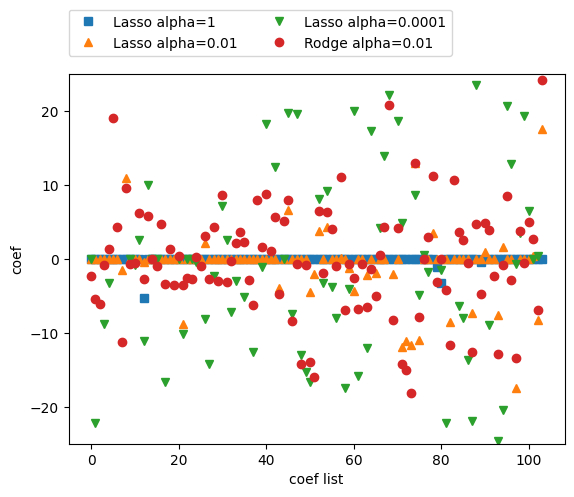

In [42]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Rodge alpha=0.01")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("coef list")
plt.ylabel("coef")
plt.show()

* 보통은 릿지 모델을 더 선호
* 하지만 특성이 많고 그 중 일부부만 중요하다면 라쏘가 더 좋은 선택이 될 수 있음
* 라쏘와 릿지를 결합한 ElasticNet도 scikit-learn에서 제공

**분류용 선형 모델** 

이진 분류 선형모델 방정식: $\hat y = w[0] \times x[0] + w[1] \times x[1] + ... + w[p] \times x[p] + b > 0 $   
=> 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기   

널리 알려진 선형 분류 알고리즘
* 로지스틱 회귀(Logistic regression)
* 서포트 벡터 머신(Support vector machine)

c:\Users\supli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


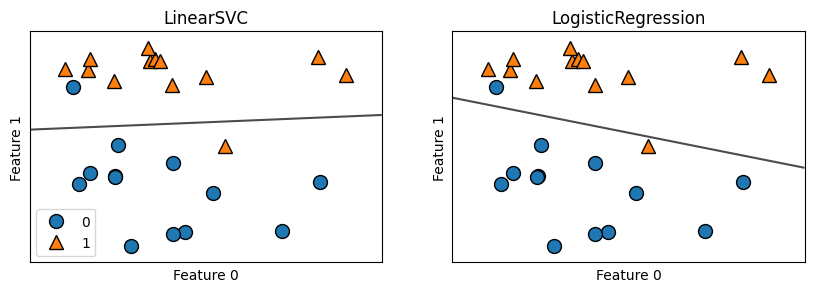

In [43]:
# forge 데이터셋을 사용하여 LogistcRegression과 LinearSVC 모델형성, 이 모델들의 결정 경계
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)   # 결정 경계(직선)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)    # 데이터 찍기
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
plt.show()

LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C이다.   
그러므로 C값이 높아지면 규제가 감소하여 훈련세트에 더 잘 맞게 되고 C값이 낮아질수록 가중치(w)의 값이 0에 가까워진다.

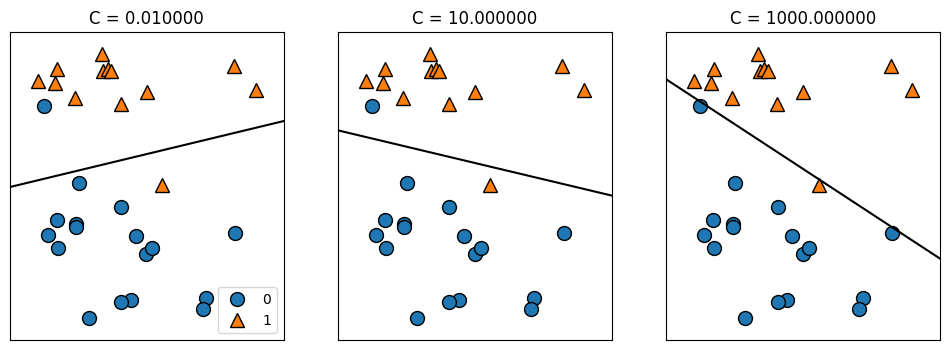

In [44]:
# C 값에 따른 결정 경계
mglearn.plots.plot_linear_svc_regularization()

위와 같이 분류에서의 선형 모델은 낮은 차원의 데이터에서는 결정 경계가 직선이거나 평면이기 때문에 매우 제한적인 것처럼 보인다.   
하지만 고차원의 경우 분류에 대한 선형 모델은 매우 강력해지며 오히려 특성이 많아지면 과대적합되지 않도록 하는 것이 매우 중요하다.

In [45]:
# 유방암 데이터셋을 사용한 LogisticRegression 분석
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))
# 훈련 세트와 테스트 세트 점수가 매우 비슷하므로 과소 적합

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [46]:
logreg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))
# C값이 클수록 (복잡도가 높은 모델일수록) 성능이 좋다.

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


In [47]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


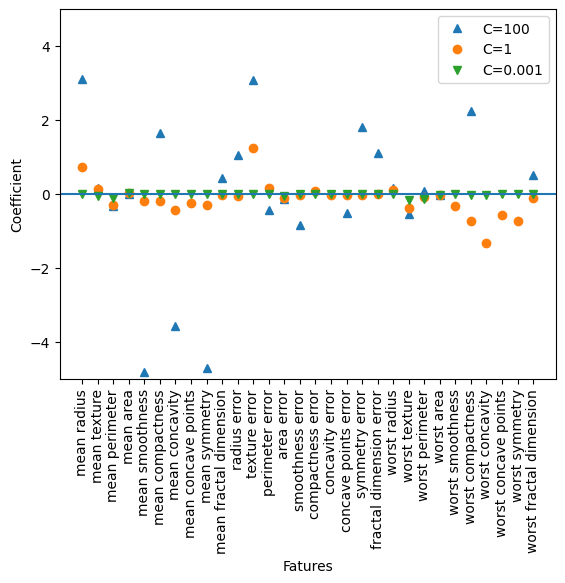

In [48]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Fatures")
plt.ylabel("Coefficient")
plt.legend()
plt.show()

C=0.001인 L1 로지스틱 회귀의 훈련 정확도: 0.913146
C=0.001인 L1 로지스틱 회귀의 테스트 정확도: 0.923077

C=1.000인 L1 로지스틱 회귀의 훈련 정확도: 0.960094
C=1.000인 L1 로지스틱 회귀의 테스트 정확도: 0.958042

C=100.000인 L1 로지스틱 회귀의 훈련 정확도: 0.985915
C=100.000인 L1 로지스틱 회귀의 테스트 정확도: 0.979021



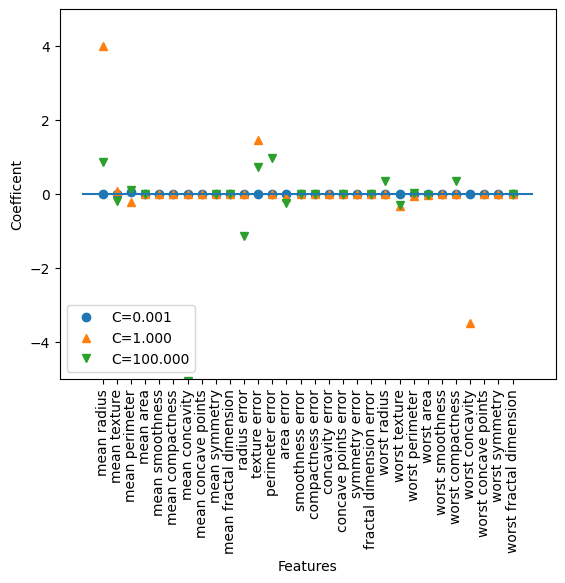

In [49]:
# L1 규제 사용(LogisticRegression은 기본적으로 L2규제 사용)
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    
    print("C={:.3f}인 L1 로지스틱 회귀의 훈련 정확도: {:2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 L1 로지스틱 회귀의 테스트 정확도: {:2f}".format(C, lr_l1.score(X_test, y_test)))
    print()
    
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlabel("Features")
plt.ylabel("Coefficent")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

**다중 클래스 분류용 선형 모델**   

대부분의(로지스틱 회귀 제외) 다중 클래스 분류 알고리즘: 일대다 방법 (각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습 

=> 클래스 수만큼 이진 분류 모델 생성)

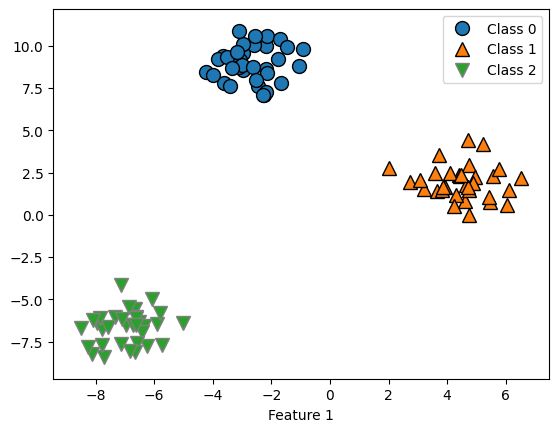

In [50]:
# 세 개의 클래스를 가진 2차원 데이터셋
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)  # default, ceters=3 (클래스 수)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.xlabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

In [51]:
# LinearSVC 분류기 훈련
linear_svm = LinearSVC().fit(X, y)

print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


c:\Users\supli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


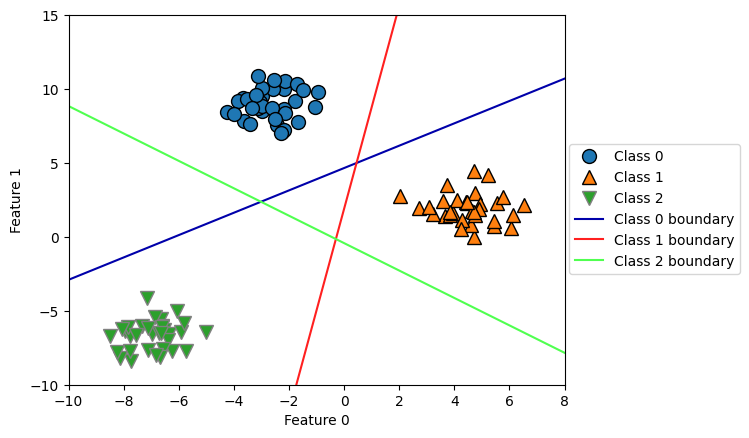

In [57]:
# 경계 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)    # 결정 경계 공식

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 boundary", "Class 1 boundary", "Class 2 boundary"], loc=(1.01, 0.3))
plt.show()

```Class 0```의 포인터들은 ```Class 0```을 구분하는 이진 분류기, ```Class 1```을 구분하는 이진 분류기, ```Class 2```를 구분하는 이진 분류기에 의해 ```Class 0```으로 분류된다.

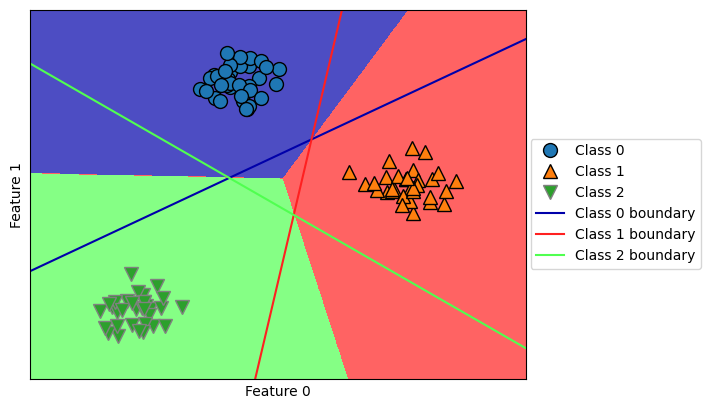

In [55]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 boundary", "Class 1 boundary", "Class 2 boundary"], loc=(1.01, 0.3))
plt.show()

반면 위 그래프 중앙의 삼각형 영역의 경우, 세 분류기가 모두 나머지로 분류했기에 분류 공식의 결과가 가장 높은 클래스로 분류된다.

**장단점과 매개변수**

* 회귀에서는 alpha 값이 클수록, 분류에서는 C 값이 작을수록 모델이 단순해진다.   
* 중요한 특성이 많지 않다면 L1 규제를, 그렇지 않다면 기본적으로 L2 규제를 사용하면 된다.
* 선형 모델은 학습 속도가 빠르고 예측 또한 빠르다.
* 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동한다.
* 샘플에 비해 특성이 많을 때 잘 작동한다.


##### 2.3.4 나이브 베이즈 분류기